# Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

df=pd.read_csv('data.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
# Check the shape of the dataframe

df.shape

(2227, 3)

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


# Cleaning the Data

In [5]:
df['x1'].fillna(df['x1'].mode()[0],axis=0,inplace=True)
df['x2'].fillna(df['x2'].mode()[0],axis=0,inplace=True)


## observation:

I replaced null values with mode of that features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2227 non-null   float64
 1   x2      2227 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


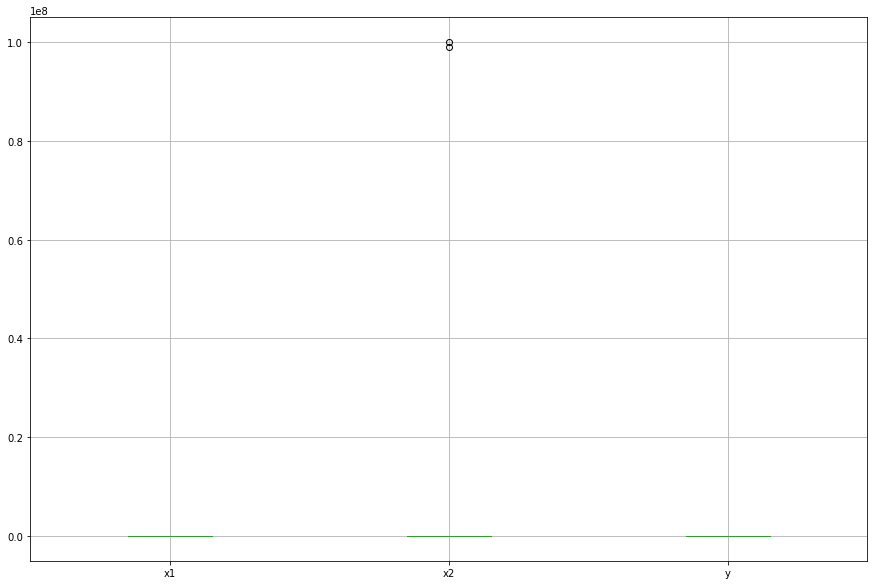

In [7]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

In [8]:
X = df.iloc[:,df.columns !='y']
Y = np.array(df['y'])
Low_Quantile = X.quantile(0.05)
High_Quantile = X.quantile(0.95)

In [9]:
LowOutliers_data = (X< Low_Quantile)
HighOutliers_data = (X > High_Quantile)
X.mask(LowOutliers_data, Low_Quantile, axis=1, inplace = True)  
X.mask(HighOutliers_data,High_Quantile,axis =1, inplace = True)

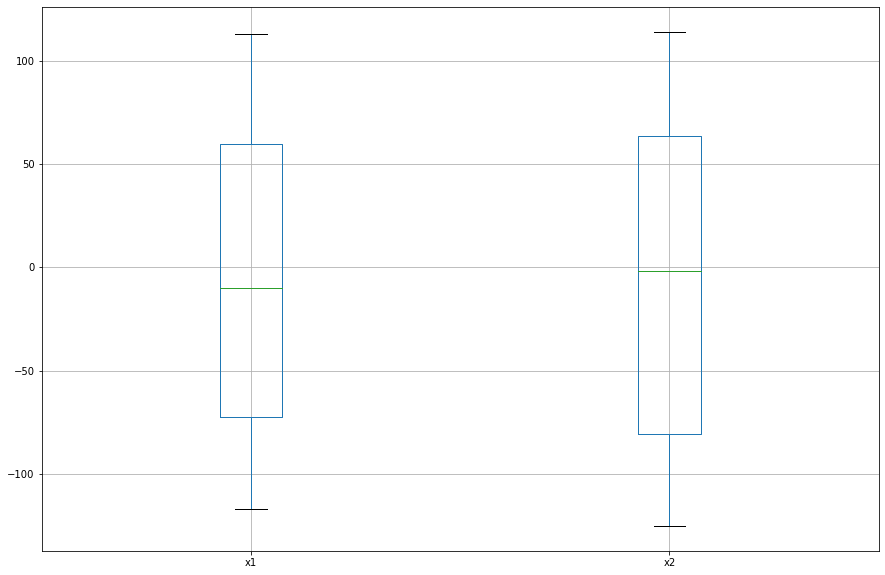

In [10]:
plt.figure(figsize=(15,10))
X.boxplot()
plt.show()

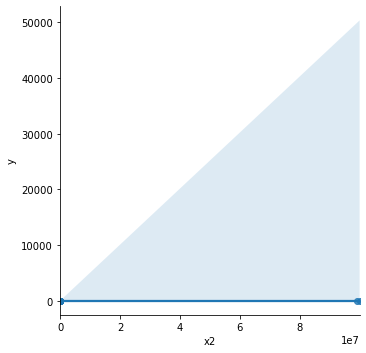

In [11]:
sns.lmplot(x='x2',y='y',data= df)

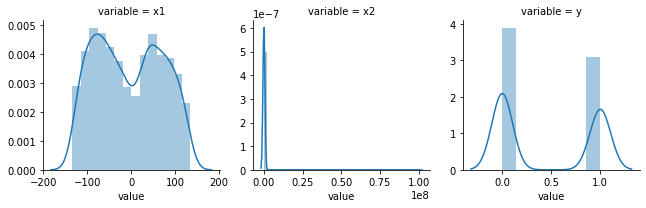

In [12]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [13]:
df.corr()

,x1,x2,y
x1,1.000000,0.037287,-0.121920
x2,0.037287,1.000000,-0.026698
y,-0.121920,-0.026698,1.000000


In [14]:
df.describe()

,x1,x2,y
count,2227.000000,2.227000e+03,2227.000000
mean,-5.073701,8.935557e+04,0.442299
std,75.048455,2.981313e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-72.170666,-8.058411e+01,0.000000
50%,-10.149873,-1.566092e+00,0.000000
75%,59.633331,6.374987e+01,1.000000
max,134.508687,1.000000e+08,1.000000


<AxesSubplot:>

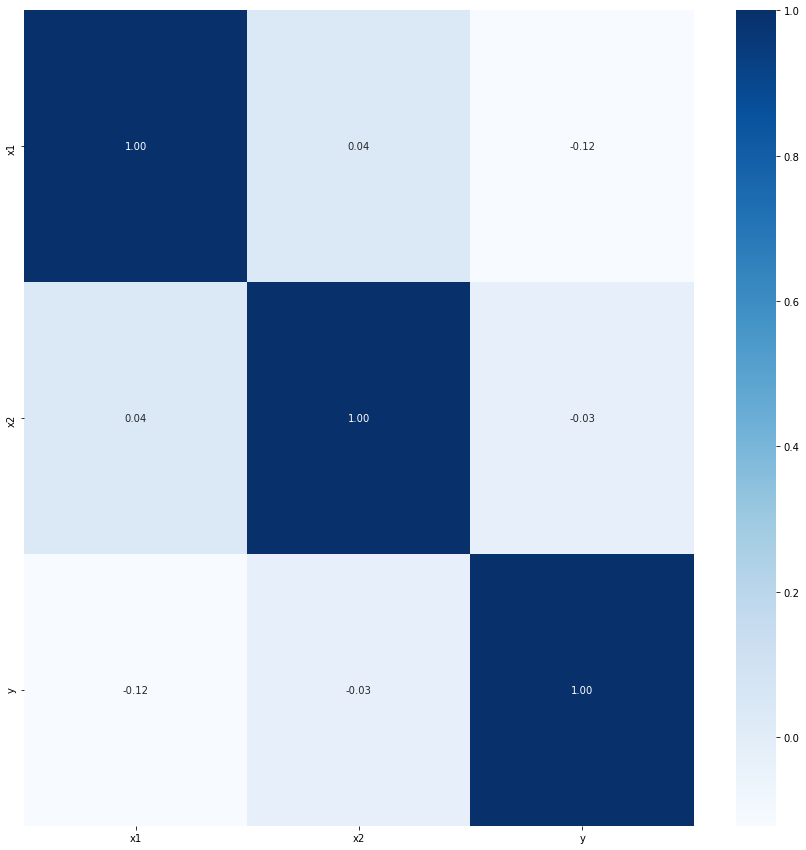

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f')

In [107]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()

In [108]:
X=df.drop('y',axis=1)
y=df['y']

In [109]:
print(X.shape,y.shape)

(2227, 2) (2227,)


In [110]:
predicts,Y=sampler.fit_resample(X,y)

In [111]:
print(predicts.shape,Y.shape)

(2484, 2) (2484,)


In [112]:
Y.value_counts()

1    1242
0    1242
Name: y, dtype: int64

In [113]:
predicts.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [114]:
predicts.shape

(2484, 2)

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler=StandardScaler()

In [117]:
predicts

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000
...,...,...
2479,-44.482587,25.462737
2480,83.936536,-78.214270
2481,-115.279440,90.836288
2482,35.754097,-39.660430


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test=train_test_split(predicts,Y,test_size=0.2)

In [120]:
print(x_train.shape,x_test.shape)

(1987, 2) (497, 2)


In [121]:
print(y_train.shape,y_test.shape)

(1987,) (497,)


In [122]:
performance_metrics_with_default_parameters=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

# Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(max_iter=10000)

In [124]:
LR_model.fit(x_train,y_train)
print('Training Accuracy : ',LR_model.score(x_train,y_train))

Training Accuracy :  0.5495722194262708


In [125]:
y_pred=LR_model.predict(x_test)
print('Testing Accuracy : ',LR_model.score(x_test,y_test))

Testing Accuracy :  0.5372233400402414


In [126]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score

In [127]:
confusion_matrix(y_test,y_pred)

array([[128, 133],
       [ 97, 139]], dtype=int64)

In [128]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.49      0.53       261
           1       0.51      0.59      0.55       236

    accuracy                           0.54       497
   macro avg       0.54      0.54      0.54       497
weighted avg       0.54      0.54      0.54       497


Accuracy is :  0.5372233400402414
Precission :  0.5110294117647058
Recall :  0.5889830508474576
f1-score :  0.547244094488189
Roc Auc score :  0.5397022533930775


In [129]:
y_pred_proba = LR_model.predict_proba(x_test)[:,1]

In [130]:
from sklearn.metrics import roc_curve,auc
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5646308201831288


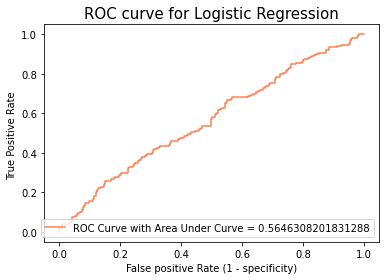

In [131]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [132]:
performance_metrics_with_default_parameters['Logistic Regression']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# SVM

In [133]:
from sklearn.svm import SVC
svm_model=SVC(probability=True)

In [134]:
svm_model.fit(x_train,y_train)
print('Training Accuracy : ',svm_model.score(x_train,y_train))

Training Accuracy :  0.5067941620533467


In [135]:
y_pred=svm_model.predict(x_test)
print('Testing Accuracy : ',svm_model.score(x_test,y_test))

Testing Accuracy :  0.4768611670020121


In [136]:
confusion_matrix(y_test,y_pred)

array([[  1, 260],
       [  0, 236]], dtype=int64)

In [137]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       261
           1       0.48      1.00      0.64       236

    accuracy                           0.48       497
   macro avg       0.74      0.50      0.33       497
weighted avg       0.75      0.48      0.31       497


Accuracy is :  0.4768611670020121
Precission :  0.47580645161290325
Recall :  1.0
f1-score :  0.644808743169399
Roc Auc score :  0.5019157088122606


In [138]:
y_pred_proba = svm_model.predict_proba(x_test)[:,1]

In [139]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.49808429118773945


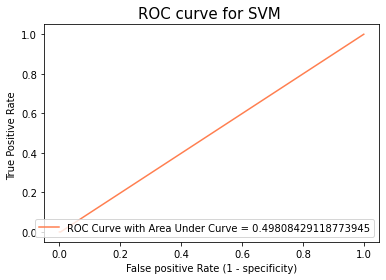

In [140]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [141]:
performance_metrics_with_default_parameters['SVM']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# KNN 

In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

In [143]:
knn_model.fit(x_train,y_train)
print('Training Accuracy : ',knn_model.score(x_train,y_train))

Training Accuracy :  0.96527428283845


In [144]:
y_pred=knn_model.predict(x_test)
print('Testing Accuracy : ',knn_model.score(x_test,y_test))

Testing Accuracy :  0.9617706237424547


In [145]:
confusion_matrix(y_test,y_pred)

array([[253,   8],
       [ 11, 225]], dtype=int64)

In [146]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       261
           1       0.97      0.95      0.96       236

    accuracy                           0.96       497
   macro avg       0.96      0.96      0.96       497
weighted avg       0.96      0.96      0.96       497


Accuracy is :  0.9617706237424547
Precission :  0.9656652360515021
Recall :  0.9533898305084746
f1-score :  0.9594882729211086
Roc Auc score :  0.9613692447561529


In [147]:
y_pred_proba = knn_model.predict_proba(x_test)[:,1]

In [148]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.9875397753100852


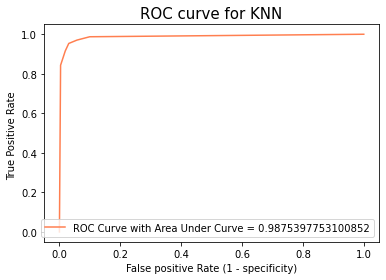

In [149]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [150]:
performance_metrics_with_default_parameters['KNN']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [152]:
dt_model.fit(x_train,y_train)
print('Training Accuracy : ',dt_model.score(x_train,y_train))

Training Accuracy :  1.0


In [153]:
y_pred=dt_model.predict(x_test)
print('Testing Accuracy : ',dt_model.score(x_test,y_test))

Testing Accuracy :  0.9557344064386318


In [154]:
confusion_matrix(y_test,y_pred)

array([[251,  10],
       [ 12, 224]], dtype=int64)

In [155]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       261
           1       0.96      0.95      0.95       236

    accuracy                           0.96       497
   macro avg       0.96      0.96      0.96       497
weighted avg       0.96      0.96      0.96       497


Accuracy is :  0.9557344064386318
Precission :  0.9572649572649573
Recall :  0.9491525423728814
f1-score :  0.9531914893617022
Roc Auc score :  0.9554191830638354


In [156]:
y_pred_proba = dt_model.predict_proba(x_test)[:,1]

In [157]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.9554191830638354


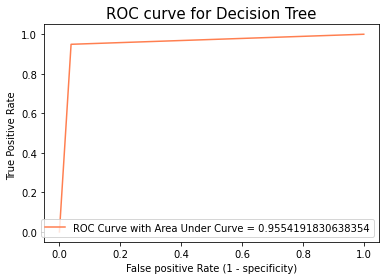

In [158]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [159]:
performance_metrics_with_default_parameters['Decision Tree']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Comparing performance of all models

In [160]:
performance_metrics_with_default_parameters

,Logistic Regression,SVM,KNN,Decision Tree
Accuracy,0.537223,0.476861,0.961771,0.955734
Precision,0.511029,0.475806,0.965665,0.957265
Recall,0.588983,1.000000,0.953390,0.949153
F1_score,0.547244,0.644809,0.959488,0.953191
AUC,0.564631,0.498084,0.987540,0.955419


## Observations:
Here we observe that KNN model giving more accuracy than other model.<br>
So that KNN model is best model for that dataset.

# Hyperparamter tuning

In [161]:
performance_metrics_with_hyperparameters=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

# Logistic Regression

In [162]:
from sklearn.model_selection import RandomizedSearchCV

In [163]:
h_params={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C':np.linspace(0,1,100)}

In [164]:
rscv=RandomizedSearchCV(estimator=LogisticRegression(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predicts,Y)

In [165]:
results.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.42424242424242425}

In [166]:
results.best_score_

0.5462784773155059

## Building Logistic model with hyperparameters

In [167]:
LR_tuned_model=results.best_estimator_
LR_tuned_model.fit(x_train,y_train)
y_pred=LR_tuned_model.predict(x_test)
y_pred_proba=LR_tuned_model.predict_proba(x_test)[:,1]

In [168]:
confusion_matrix(y_test,y_pred)

array([[128, 133],
       [ 98, 138]], dtype=int64)

In [169]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.49      0.53       261
           1       0.51      0.58      0.54       236

    accuracy                           0.54       497
   macro avg       0.54      0.54      0.54       497
weighted avg       0.54      0.54      0.53       497


Accuracy is :  0.5352112676056338
Precission :  0.5092250922509225
Recall :  0.5847457627118644
f1-score :  0.5443786982248521
Roc Auc score :  0.5375836093252809


In [170]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5644847067991428


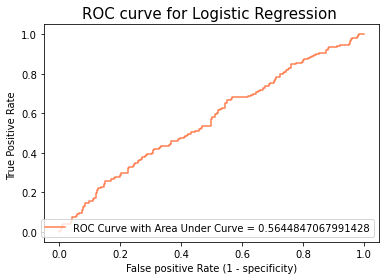

In [171]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [172]:
performance_metrics_with_hyperparameters['Logistic Regression']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# KNN

In [173]:
h_params={'n_neighbors':range(1,11,2),'weights':['uniform','distance'],'metric':['minkowski','euclidean','manhattan']}

In [174]:
rscv=RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predicts,Y)

In [175]:
results.best_params_

{'weights': 'uniform', 'n_neighbors': 5, 'metric': 'euclidean'}

In [176]:
results.best_score_

0.9432311611605113

## Building knn model with hyperparameters

In [177]:
knn_tuned_model=results.best_estimator_
knn_tuned_model.fit(x_train,y_train)
y_pred=knn_tuned_model.predict(x_test)
y_pred_proba=knn_tuned_model.predict_proba(x_test)[:,1]


confusion_matrix(y_test,y_pred)

array([[253,   8],
       [ 11, 225]], dtype=int64)

In [178]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       261
           1       0.97      0.95      0.96       236

    accuracy                           0.96       497
   macro avg       0.96      0.96      0.96       497
weighted avg       0.96      0.96      0.96       497


Accuracy is :  0.9617706237424547
Precission :  0.9656652360515021
Recall :  0.9533898305084746
f1-score :  0.9594882729211086
Roc Auc score :  0.9613692447561529


In [179]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.9875397753100852


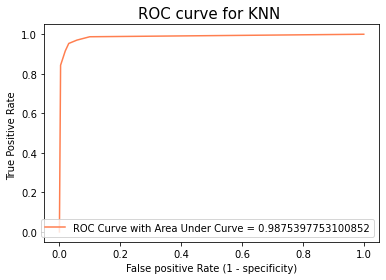

In [180]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [181]:
performance_metrics_with_hyperparameters['KNN']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [182]:
h_params={'criterion':["gini", "entropy"],
        'splitter':["best", "random"],
        'max_depth':[1,3,5,7,10,15,20,25,30],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60,70,80,90]}

In [183]:
rscv=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predicts,Y)

In [184]:
results.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'max_leaf_nodes': 70,
 'max_features': 'sqrt',
 'max_depth': 15,
 'criterion': 'entropy'}

In [185]:
results.best_score_

0.9178741805672745

## Building Decision Tree model with hyperparameters

In [186]:
dt_tuned_model=results.best_estimator_
dt_tuned_model.fit(x_train,y_train)
y_pred=dt_tuned_model.predict(x_test)
y_pred_proba=dt_tuned_model.predict_proba(x_test)[:,1]


confusion_matrix(y_test,y_pred)

array([[242,  19],
       [  8, 228]], dtype=int64)

In [187]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       261
           1       0.92      0.97      0.94       236

    accuracy                           0.95       497
   macro avg       0.95      0.95      0.95       497
weighted avg       0.95      0.95      0.95       497


Accuracy is :  0.9456740442655935
Precission :  0.9230769230769231
Recall :  0.9661016949152542
f1-score :  0.9440993788819877
Roc Auc score :  0.946652380024677


In [188]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.9735859471394247


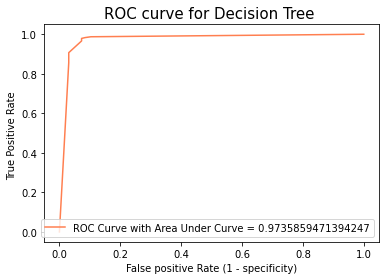

In [189]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [190]:
performance_metrics_with_hyperparameters['Decision Tree']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# performance_metrics_with_hyperparameters

In [191]:
performance_metrics_with_hyperparameters

,Logistic Regression,KNN,Decision Tree
Accuracy,0.535211,0.961771,0.945674
Precision,0.509225,0.965665,0.923077
Recall,0.584746,0.953390,0.966102
F1_score,0.544379,0.959488,0.944099
AUC,0.564485,0.987540,0.973586


# Observations:
Here we observe that the x2 columns contains outlier then removed it.<br>
Here I was also use SMOTE for balancing data then genrated Models.<br>
Here we observe that all the models with their Accuracy,Precision,Recall,F1_score and AUC.<br> 
Here we observe that KNN model giving more accuracy and all than other model.<br>
So that KNN model is best model for that dataset.